In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

In [ ]:
# Splitting dataset into training and testing
 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=.25, random_state=0)


In [ ]:
# Fitting simple linear regression to dataset

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Predcting the data

y_pred = regressor.predict(x_test)


In [ ]:
# Accuracy Testing 

from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
print(accuracy*100)

93.47068473282425


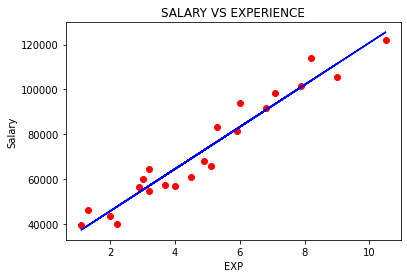

In [ ]:
# Visualisation of Linear Regression

plt.scatter(x_train,y_train, color ="red")
plt.plot(x_train,regressor.predict(x_train), color="blue" )
plt.title("SALARY VS EXPERIENCE")
plt.xlabel("EXP")
plt.ylabel("Salary")
plt.show() 

# Multi Linear Regression

In [ ]:
data = pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
X =data.iloc[:,:-1].values
Y = data.iloc[:,4].values

In [ ]:
# Encoding the independent variable

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_x = LabelEncoder()
X[:,3] = label_x.fit_transform(X[:,3])
onehot = OneHotEncoder()
a = onehot.fit_transform(X[:,[3]]).toarray()

In [ ]:
# Avoiding the dummy variable trap

a = a[:,1:]

In [ ]:
# Adding encoding data into X

X = X[:,:3]
X = np.concatenate((X,a),axis=1)


In [ ]:
# splitting dataset into train data and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [ ]:
# Making Linear model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
print(accuracy*100)

93.58680970046242


In [ ]:
# Adding column of 1's in x
import statsmodels.formula.api as sm
X= np.append(arr=np.ones((50,1)).astype(int),values=X, axis=1)

In [ ]:
import statsmodels.api as sm1
# Backward elimination

X_opt = np.array(X[:,[0,1,3]],dtype=float) # 0-5 reomed P>|t|	value > 0.5(Threshold value)
regressor_OLS = sm1.OLS(endog=Y,exog=X_opt).fit()
display(regressor_OLS.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           2.16e-31
Time:                        10:17:46   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Forward Selection

X_opt2 = np.array(X[:,[0,1,3]],dtype=float)
regressor_OLS2 = sm1.OLS(endog=Y,exog=X_opt2).fit()
display(regressor_OLS2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           2.16e-31
Time:                        10:23:05   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

the columns 0,1,3 (Independent Variables) are more related with the dependent variable 

In [ ]:
data = pd.read_csv("Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
X = data.iloc[:,1:2].values
Y = data.iloc[:,2].values

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
regressor2 = LinearRegression()
regressor2.fit(X_poly,Y)


LinearRegression()

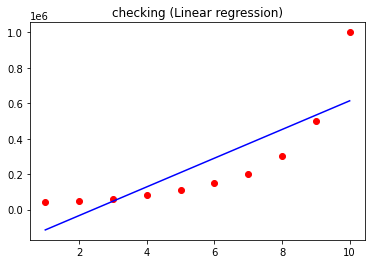

In [ ]:
plt.scatter(X,Y, color = "red")
plt.plot(X, regressor.predict(X), color = "blue")
plt.title("checking (Linear regression)")
plt.show()

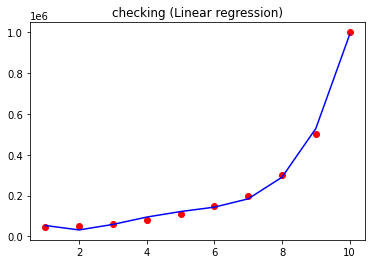

In [ ]:
plt.scatter(X,Y, color = "red")
plt.plot(X,regressor2.predict(poly_reg.fit_transform(X)), color = "blue")
plt.title("checking (Polynomial Regression)")
plt.show()

In [ ]:
regressor.predict([[6]])

array([289939.39393939])

In [ ]:
regressor2.predict(poly_reg.fit_transform([[5]]))

array([121724.94172495])

# Decision Tree Regression

In [ ]:
data = pd.read_csv("Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
X = data.iloc[:,1:2].values
Y = data.iloc[:,2].values

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,Y)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict([[6.5]])
print(y_pred)

[150000.]


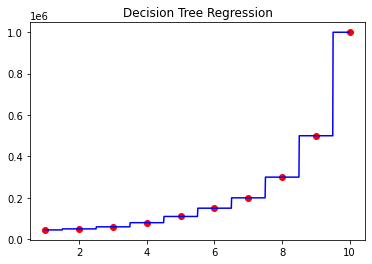

In [ ]:
x_grid = np.arange(min(X),max(X),0.01)
x_grid = x_grid.reshape((len(x_grid),1))

plt.scatter(X,Y, color = "red")
plt.plot(x_grid,regressor.predict(x_grid), color = "blue")
plt.title("Decision Tree Regression")
plt.show()

# Random Forest Regression

In [ ]:
X = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X,y)

RandomForestRegressor(n_estimators=300, random_state=0)

In [ ]:
y_pred = regressor.predict([[6.5]])

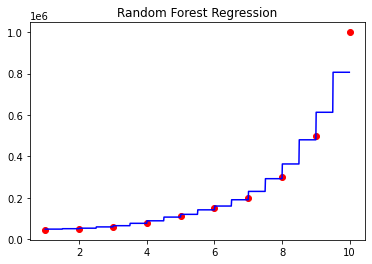

In [ ]:
x_grid = np.arange(min(X),max(X),0.01)
x_grid = x_grid.reshape((len(x_grid),1))

plt.scatter(X,y, color = "red")
plt.plot(x_grid,regressor.predict(x_grid), color = "blue")
plt.title("Random Forest Regression")
plt.show()

# Logistic Regression

In [ ]:
data = pd.read_csv("Social_Network_Ads.csv")
X = data.iloc[:,2:4].values
y = data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=.25, random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[63  5]
 [ 8 24]]


# Support vector regression (SVR)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
# y = y.reshape(len(y),1)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X)
# y = sc_y.fit_transform(y)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

In [ ]:
y_pred = regressor.predict([[6]])
print(y_pred)

[130000.951699]
